<a href="https://colab.research.google.com/github/Ramanmagar/Air-bnb-bookings-Analysis/blob/main/Copy_of_Airbnb_Bookings_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path_dir = '/content/drive/MyDrive/Colab Notebooks/Capstone Project /AirBnB Booking Analysis/AirBnB Bookings Analysis/Airbnb NYC 2019.csv'
df = pd.read_csv(file_path_dir)

In [ ]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [ ]:
df.shape

(48895, 16)

In [ ]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [ ]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [ ]:
columns_to_keep = ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365']

In [ ]:
df = df[columns_to_keep]
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
df.shape

(48895, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  calculated_host_listings_count  

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,327.000000,365.000000


In [ ]:
df.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [ ]:
df[df['name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.01620,Entire home/apt,400,1000,0,1,362
3703,2232600,NaN,11395220,Anna,Manhattan,East Village,40.73215,-73.98821,Entire home/apt,200,1,28,1,341
5775,4209595,NaN,20700823,Jesse,Manhattan,Greenwich Village,40.73473,-73.99244,Entire home/apt,225,1,1,1,0
5975,4370230,NaN,22686810,Michaël,Manhattan,Nolita,40.72046,-73.99550,Entire home/apt,215,7,5,1,0
6269,4581788,NaN,21600904,Lucie,Brooklyn,Williamsburg,40.71370,-73.94378,Private room,150,1,0,1,0
6567,4756856,NaN,1832442,Carolina,Brooklyn,Bushwick,40.70046,-73.92825,Private room,70,1,0,1,0
6605,4774658,NaN,24625694,Josh,Manhattan,Washington Heights,40.85198,-73.93108,Private room,40,1,0,1,0
8841,6782407,NaN,31147528,Huei-Yin,Brooklyn,Williamsburg,40.71354,-73.93882,Private room,45,1,0,1,0
11963,9325951,NaN,33377685,Jonathan,Manhattan,Hell's Kitchen,40.76436,-73.98573,Entire home/apt,190,4,1,1,0
12824,9787590,NaN,50448556,Miguel,Manhattan,Harlem,40.80316,-73.95189,Entire home/apt,300,5,0,5,0


In [ ]:
xyz = df[df['id']==1615764]
xyz

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
2854,1615764,NaN,6676776,Peter,Manhattan,Battery Park City,40.71239,-74.0162,Entire home/apt,400,1000,0,1,362


In [ ]:
df[df['host_name'].isnull()]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
360,100184,Bienvenue,526653,NaN,Queens,Queens Village,40.72413,-73.76133,Private room,50,1,43,1,88
2700,1449546,Cozy Studio in Flatbush,7779204,NaN,Brooklyn,Flatbush,40.64965,-73.96154,Entire home/apt,100,30,49,1,342
5745,4183989,SPRING in the City!! Zen-Style Tranquil Bedroom,919218,NaN,Manhattan,Harlem,40.80606,-73.95061,Private room,86,3,34,1,359
6075,4446862,Charming Room in Prospect Heights!,23077718,NaN,Brooklyn,Crown Heights,40.67512,-73.96146,Private room,50,1,0,1,0
6582,4763327,"Luxurious, best location, spa inc'l",24576978,NaN,Brooklyn,Greenpoint,40.72035,-73.95355,Entire home/apt,195,1,1,1,0
8163,6292866,Modern Quiet Gem Near All,32722063,NaN,Brooklyn,East Flatbush,40.65263,-73.93215,Entire home/apt,85,2,182,2,318
8257,6360224,"Sunny, Private room in Bushwick",33134899,NaN,Brooklyn,Bushwick,40.70146,-73.92792,Private room,37,1,1,1,0
8852,6786181,R&S Modern Spacious Hideaway,32722063,NaN,Brooklyn,East Flatbush,40.64345,-73.93643,Entire home/apt,100,2,157,2,342
9138,6992973,1 Bedroom in Prime Williamsburg,5162530,NaN,Brooklyn,Williamsburg,40.71838,-73.95630,Entire home/apt,145,1,0,1,0
9817,7556587,Sunny Room in Harlem,39608626,NaN,Manhattan,Harlem,40.82929,-73.94182,Private room,28,1,1,1,0


In [ ]:
df[df['host_name'].isnull()].shape

(21, 14)

In [ ]:
df.latitude.describe()

count    48895.000000
mean        40.728949
std          0.054530
min         40.499790
25%         40.690100
50%         40.723070
75%         40.763115
max         40.913060
Name: latitude, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


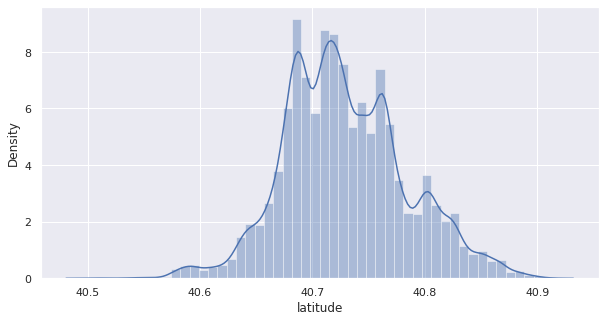

In [ ]:
# Histogram
sns.distplot(df['latitude'])

In [ ]:
df.longitude.describe()

count    48895.000000
mean       -73.952170
std          0.046157
min        -74.244420
25%        -73.983070
50%        -73.955680
75%        -73.936275
max        -73.712990
Name: longitude, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


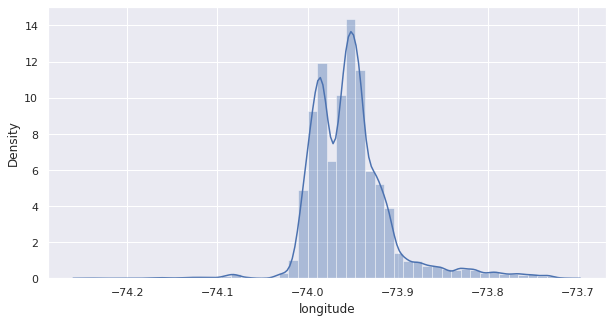

In [ ]:
sns.distplot(df['longitude'])

In [ ]:
host_area = df.groupby(['host_name','neighbourhood_group'])['calculated_host_listings_count'].count().reset_index()
host_areas = host_area.sort_values(by='calculated_host_listings_count',ascending=False).head(20)
host_areas

,host_name,neighbourhood_group,calculated_host_listings_count
13217,Sonder (NYC),Manhattan,327
1834,Blueground,Manhattan,230
9742,Michael,Manhattan,212
3250,David,Manhattan,202
9741,Michael,Brooklyn,159
6808,John,Manhattan,151
3249,David,Brooklyn,142
7275,Kara,Manhattan,135
432,Alex,Manhattan,134
9856,Mike,Manhattan,134


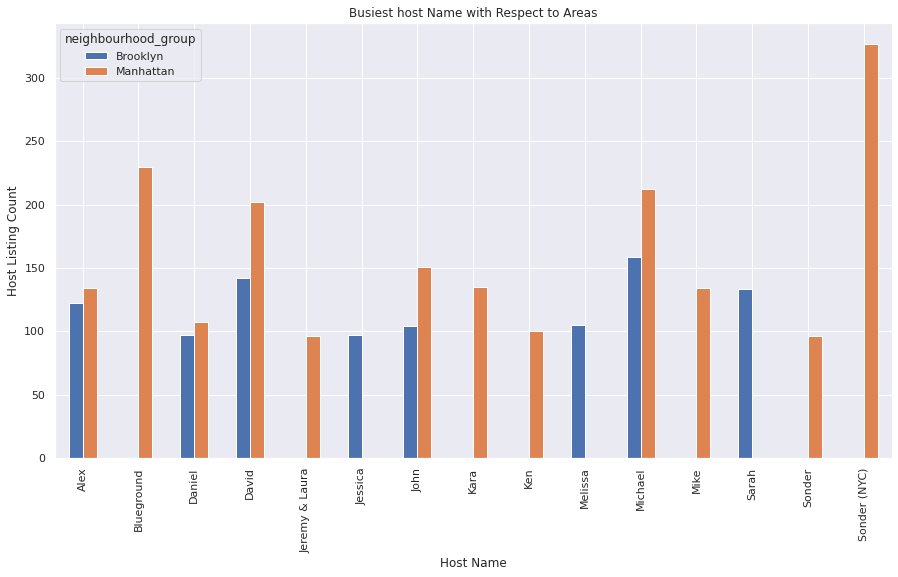

In [ ]:
host_areas.pivot(index='host_name',columns='neighbourhood_group',values='calculated_host_listings_count').plot(kind='bar',figsize=(15,8))
plt.title('Busiest host Name with Respect to Areas')
plt.xlabel('Host Name')
plt.ylabel('Host Listing Count')
plt.show()

###

In [ ]:
# sns.catplot(x="host_name", hue='neighbourhood_group', col="calculated_host_listings_count" ,data=host_areas, kind='count')
# plt.xlabel('calculated_host_listings_count')
# plt.ylabel('host_name')
# plt.rcParams('figure.figsize')= 16,8

In [ ]:
new_df = df.groupby(['neighbourhood','room_type'])['price'].mean().reset_index()
new_df1 = new_df.sort_values(by='price',ascending=False).head(10)
new_df1

,neighbourhood,room_type,price
410,Riverdale,Private room,803.500000
411,Riverdale,Shared room,800.000000
205,Fort Wadsworth,Entire home/apt,800.000000
536,Woodrow,Entire home/apt,700.000000
393,Randall Manor,Entire home/apt,651.000000
425,Sea Gate,Entire home/apt,649.400000
482,Tribeca,Entire home/apt,561.818182
383,Prince's Bay,Entire home/apt,506.666667
14,Battery Park City,Entire home/apt,488.541667
185,Flatiron District,Entire home/apt,388.000000


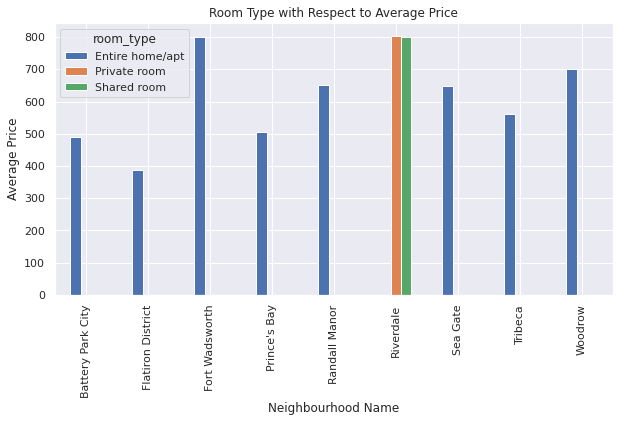

In [ ]:
new_df1.pivot(index='neighbourhood',columns='room_type',values='price').plot(kind='bar',figsize=(10,5))
plt.title('Room Type with Respect to Average Price')
plt.xlabel('Neighbourhood Name')
plt.ylabel('Average Price')
plt.show()

In [ ]:
# sns.set(rc={'figure.figsize':(10,6)})
# bar_chart = new_df.plot(kind='bar')
# bar_chart.set_title('Hosts with price according to room type')
# bar_chart.set_xlabel('neighbourhood')
# bar_chart.set_ylabel('price')

In [ ]:
room_type_with_resp_price = df.groupby(['neighbourhood','room_type'])['price'].count().reset_index().sort_values(by='price',ascending=False).head(10)
room_type_with_resp_price

,neighbourhood,room_type,price
31,Bedford-Stuyvesant,Private room,2038
525,Williamsburg,Private room,1997
524,Williamsburg,Entire home/apt,1891
68,Bushwick,Private room,1719
30,Bedford-Stuyvesant,Entire home/apt,1591
234,Harlem,Private room,1573
491,Upper East Side,Entire home/apt,1310
494,Upper West Side,Entire home/apt,1256
236,Hell's Kitchen,Entire home/apt,1187
157,East Village,Entire home/apt,1170


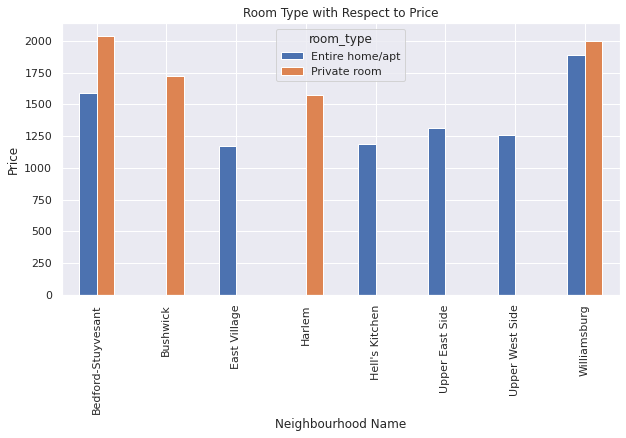

In [ ]:
room_type_with_resp_price.pivot(index='neighbourhood',columns='room_type',values='price').plot(kind='bar',figsize=(10,5))
plt.title('Room Type with Respect to Price')
plt.xlabel('Neighbourhood Name')
plt.ylabel('Price')
plt.show()

In [ ]:
room_price_in_diff_areas = df.groupby(['neighbourhood_group','room_type'])['price'].count().reset_index().sort_values(by='price',ascending=False)
room_price_in_diff_areas

,neighbourhood_group,room_type,price
6,Manhattan,Entire home/apt,13199
4,Brooklyn,Private room,10132
3,Brooklyn,Entire home/apt,9559
7,Manhattan,Private room,7982
10,Queens,Private room,3372
9,Queens,Entire home/apt,2096
1,Bronx,Private room,652
8,Manhattan,Shared room,480
5,Brooklyn,Shared room,413
0,Bronx,Entire home/apt,379


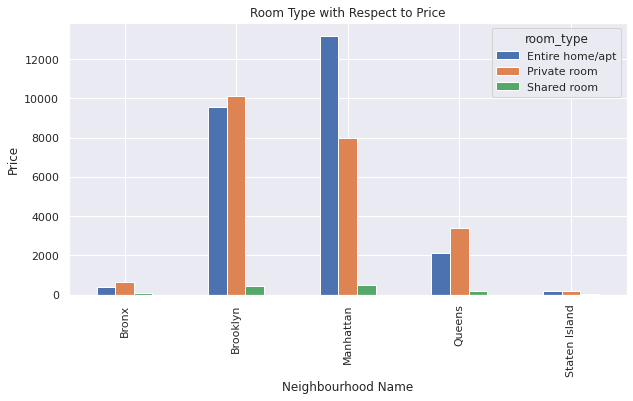

In [ ]:
room_price_in_diff_areas.pivot(index='neighbourhood_group',columns='room_type',values='price').plot(kind='bar',figsize=(10,5))
plt.title('Room Type with Respect to Price')
plt.xlabel('Neighbourhood Name')
plt.ylabel('Price')
plt.show()

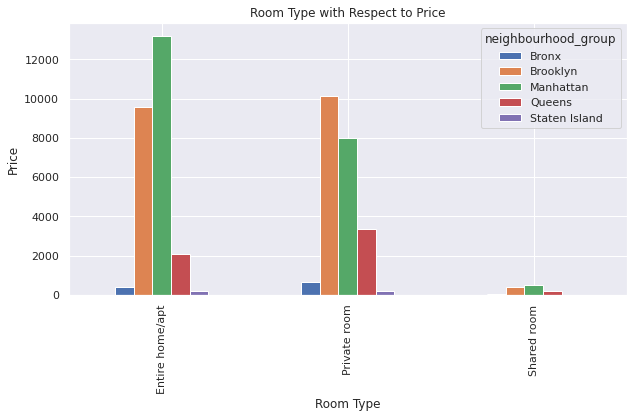

In [ ]:
room_price_in_diff_areas.pivot(index='room_type',columns='neighbourhood_group',values='price').plot(kind='bar',figsize=(10,5))
plt.title('Room Type with Respect to Price')
plt.xlabel('Room Type')
plt.ylabel('Price')
plt.show()

In [ ]:
prices_in_diff_areas = df.groupby('neighbourhood_group')['price'].mean()
a = prices_in_diff_areas.reset_index()
# a.drop('index',axis='columns', inplace=True)
# a
prices_in_diff_areas

neighbourhood_group
Bronx             87.496792
Brooklyn         124.383207
Manhattan        196.875814
Queens            99.517649
Staten Island    114.812332
Name: price, dtype: float64

Text(0, 0.5, 'Price')

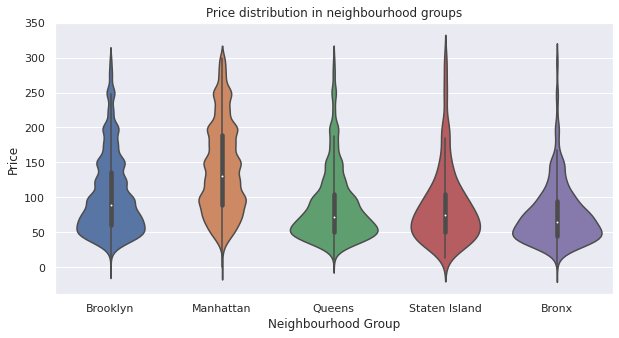

In [ ]:
sns.violinplot(x="neighbourhood_group",y="price", data=df[df["price"]<300])
plt.title("Price distribution in neighbourhood groups")
plt.xlabel("Neighbourhood Group")
plt.ylabel("Price")

Text(0, 0.5, 'Average Price')

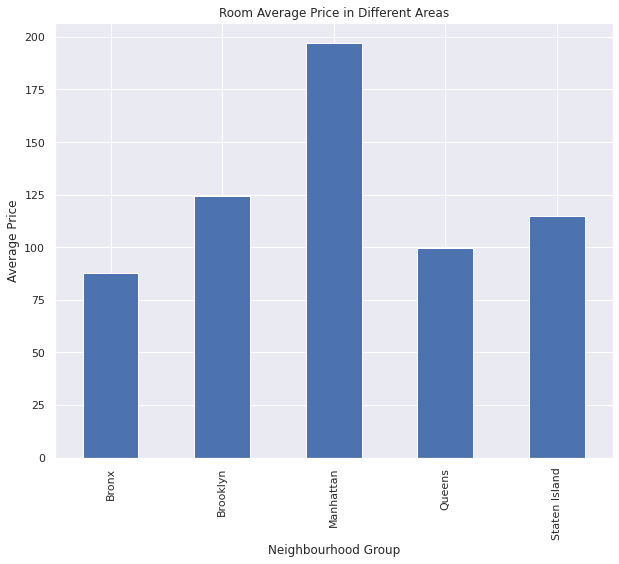

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
bar_chart = prices_in_diff_areas.plot(kind='bar')
bar_chart.set_title('Room Average Price in Different Areas')
bar_chart.set_xlabel('Neighbourhood Group')
bar_chart.set_ylabel('Average Price')

In [ ]:
room_type_resp_price = df.groupby(['room_type'])['price'].mean()
room_type_resp_price

room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

Text(0, 0.5, 'Average Price')

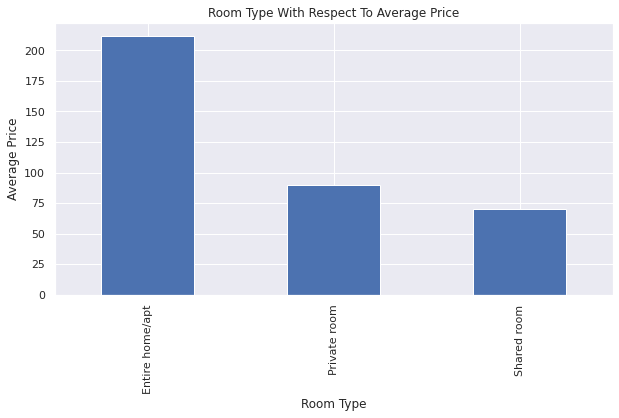

In [ ]:
sns.set(rc={'figure.figsize':(10,5)})
bar_chart = room_type_resp_price.plot(kind='bar')
bar_chart.set_title('Room Type With Respect To Average Price')
bar_chart.set_xlabel('Room Type')
bar_chart.set_ylabel('Average Price')

In [ ]:
room_prices_acc_to_areas = df.groupby(['neighbourhood_group','room_type'])['price'].mean().reset_index().sort_values(by='price',ascending=False)
room_prices_acc_to_areas

,neighbourhood_group,room_type,price
6,Manhattan,Entire home/apt,249.239109
3,Brooklyn,Entire home/apt,178.327545
12,Staten Island,Entire home/apt,173.846591
9,Queens,Entire home/apt,147.050573
0,Bronx,Entire home/apt,127.506596
7,Manhattan,Private room,116.776622
8,Manhattan,Shared room,88.977083
4,Brooklyn,Private room,76.500099
10,Queens,Private room,71.762456
11,Queens,Shared room,69.020202


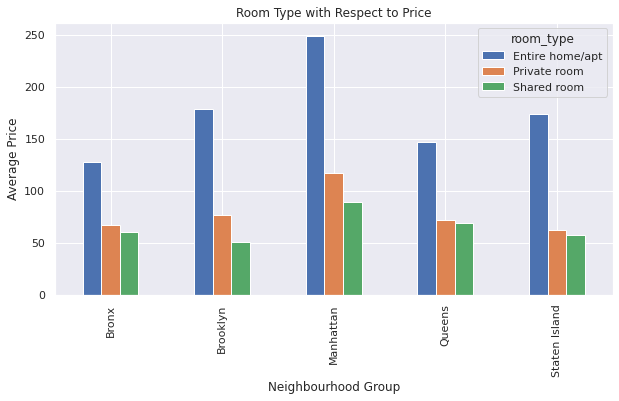

In [ ]:
room_prices_acc_to_areas.pivot(index='neighbourhood_group',columns='room_type',values='price').plot(kind='bar',figsize=(10,5))
plt.title('Room Type with Respect to Price')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Average Price')
plt.show()

In [ ]:
# df.groupby(['room_type'])['price'].mean().reset_index().plot(kind="bar")
# df.groupby(['neighbourhood_group','room_type'])['price'].count().reset_index().plot(kind="bar")
# plt.title('Room Type With Respect To Average Price')
# plt.ylabel('Average Price')
# plt.xlabel('Room Type')

In [ ]:
abc = df.groupby(['neighbourhood_group','room_type','price','minimum_nights'])['number_of_reviews'].max().reset_index()
# room_prices_acc_to_areas.sort_values(by='price',ascending=False)
abc.sort_values(by='number_of_reviews',ascending=False).head(15)

,neighbourhood_group,room_type,price,minimum_nights,number_of_reviews
8835,Queens,Private room,47,1,629
6548,Manhattan,Private room,49,1,607
8829,Queens,Private room,46,1,543
7087,Manhattan,Private room,99,2,540
8844,Queens,Private room,48,1,510
1472,Brooklyn,Entire home/apt,160,1,488
2823,Brooklyn,Private room,60,3,480
8900,Queens,Private room,55,1,474
1153,Brooklyn,Entire home/apt,120,30,467
8977,Queens,Private room,65,1,466


In [ ]:
reviews_in_diff_areas = df.groupby(['neighbourhood_group','room_type'])['number_of_reviews'].count().reset_index()
reviews_in_diff_areas

,neighbourhood_group,room_type,number_of_reviews
0,Bronx,Entire home/apt,379
1,Bronx,Private room,652
2,Bronx,Shared room,60
3,Brooklyn,Entire home/apt,9559
4,Brooklyn,Private room,10132
5,Brooklyn,Shared room,413
6,Manhattan,Entire home/apt,13199
7,Manhattan,Private room,7982
8,Manhattan,Shared room,480
9,Queens,Entire home/apt,2096


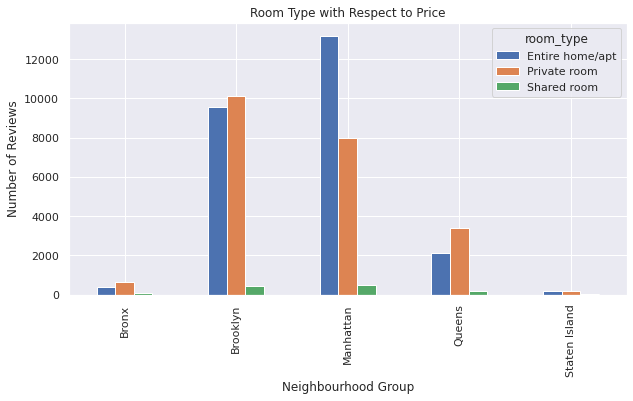

In [ ]:
reviews_in_diff_areas.pivot(index='neighbourhood_group',columns='room_type',values='number_of_reviews').plot(kind='bar',figsize=(10,5))
plt.title('Room Type with Respect to Price')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Reviews')
plt.show()

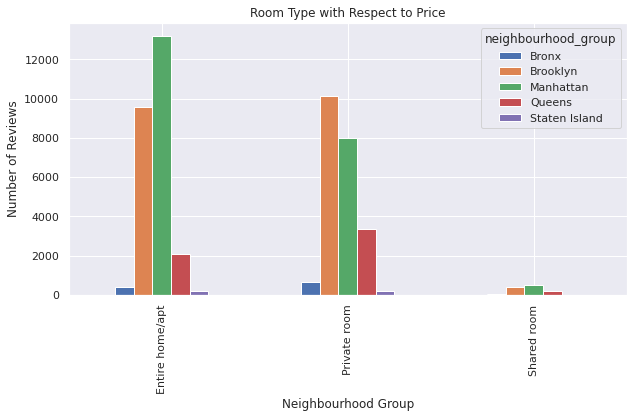

In [ ]:
reviews_in_diff_areas.pivot(index='room_type',columns='neighbourhood_group',values='number_of_reviews').plot(kind='bar',figsize=(10,5))
plt.title('Room Type with Respect to Price')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Reviews')
plt.show()

In [ ]:
rooms_available = df.groupby(['neighbourhood_group','room_type'])['availability_365'].mean().reset_index()
# rooms_available.sort_values(by='number_of_reviews',ascending=False).head(100)
rooms_available

,neighbourhood_group,room_type,availability_365
0,Bronx,Entire home/apt,158.000000
1,Bronx,Private room,171.331288
2,Bronx,Shared room,154.216667
3,Brooklyn,Entire home/apt,97.205147
4,Brooklyn,Private room,99.917983
5,Brooklyn,Shared room,178.007264
6,Manhattan,Entire home/apt,117.140996
7,Manhattan,Private room,101.845026
8,Manhattan,Shared room,138.572917
9,Queens,Entire home/apt,132.267176


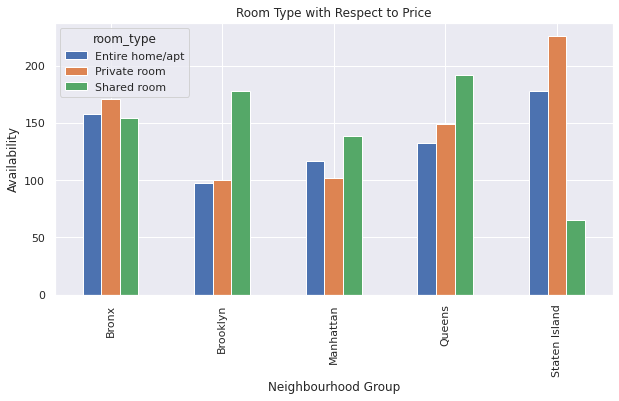

In [ ]:
rooms_available.pivot(index='neighbourhood_group',columns='room_type',values='availability_365').plot(kind='bar',figsize=(10,5))
plt.title('Room Type with Respect to Price')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Availability')
plt.show()

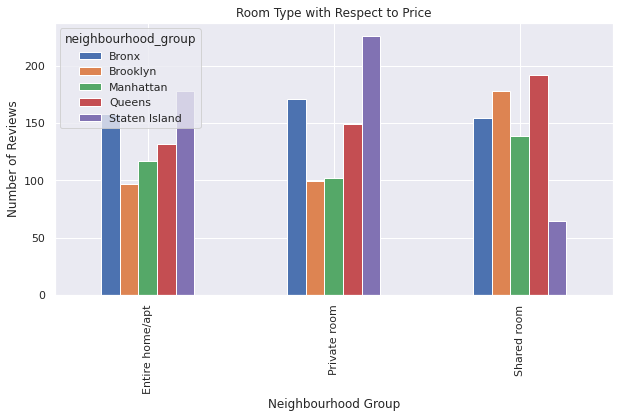

In [ ]:
rooms_available.pivot(index='room_type',columns='neighbourhood_group',values='availability_365').plot(kind='bar',figsize=(10,5))
plt.title('Room Type with Respect to Price')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Reviews')
plt.show()

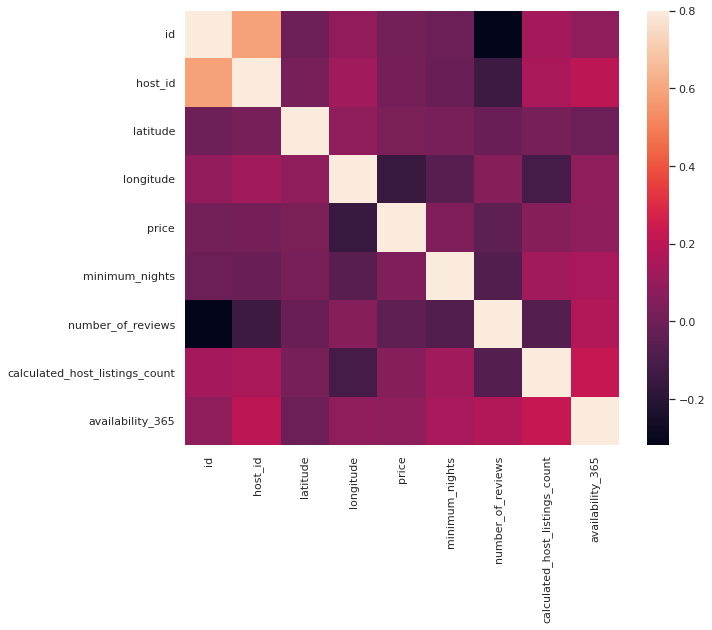

In [ ]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

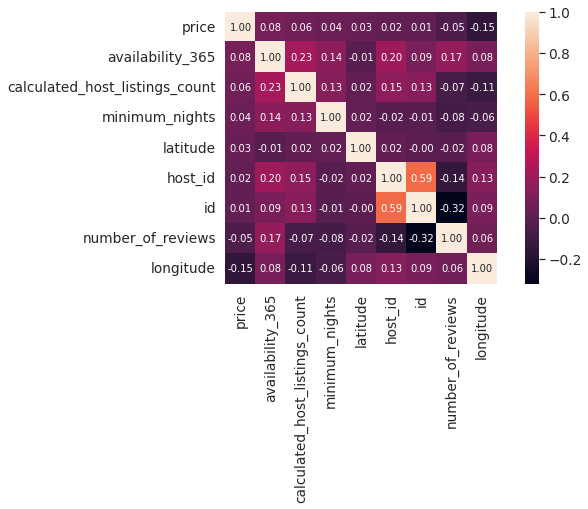

In [ ]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'price')['price'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


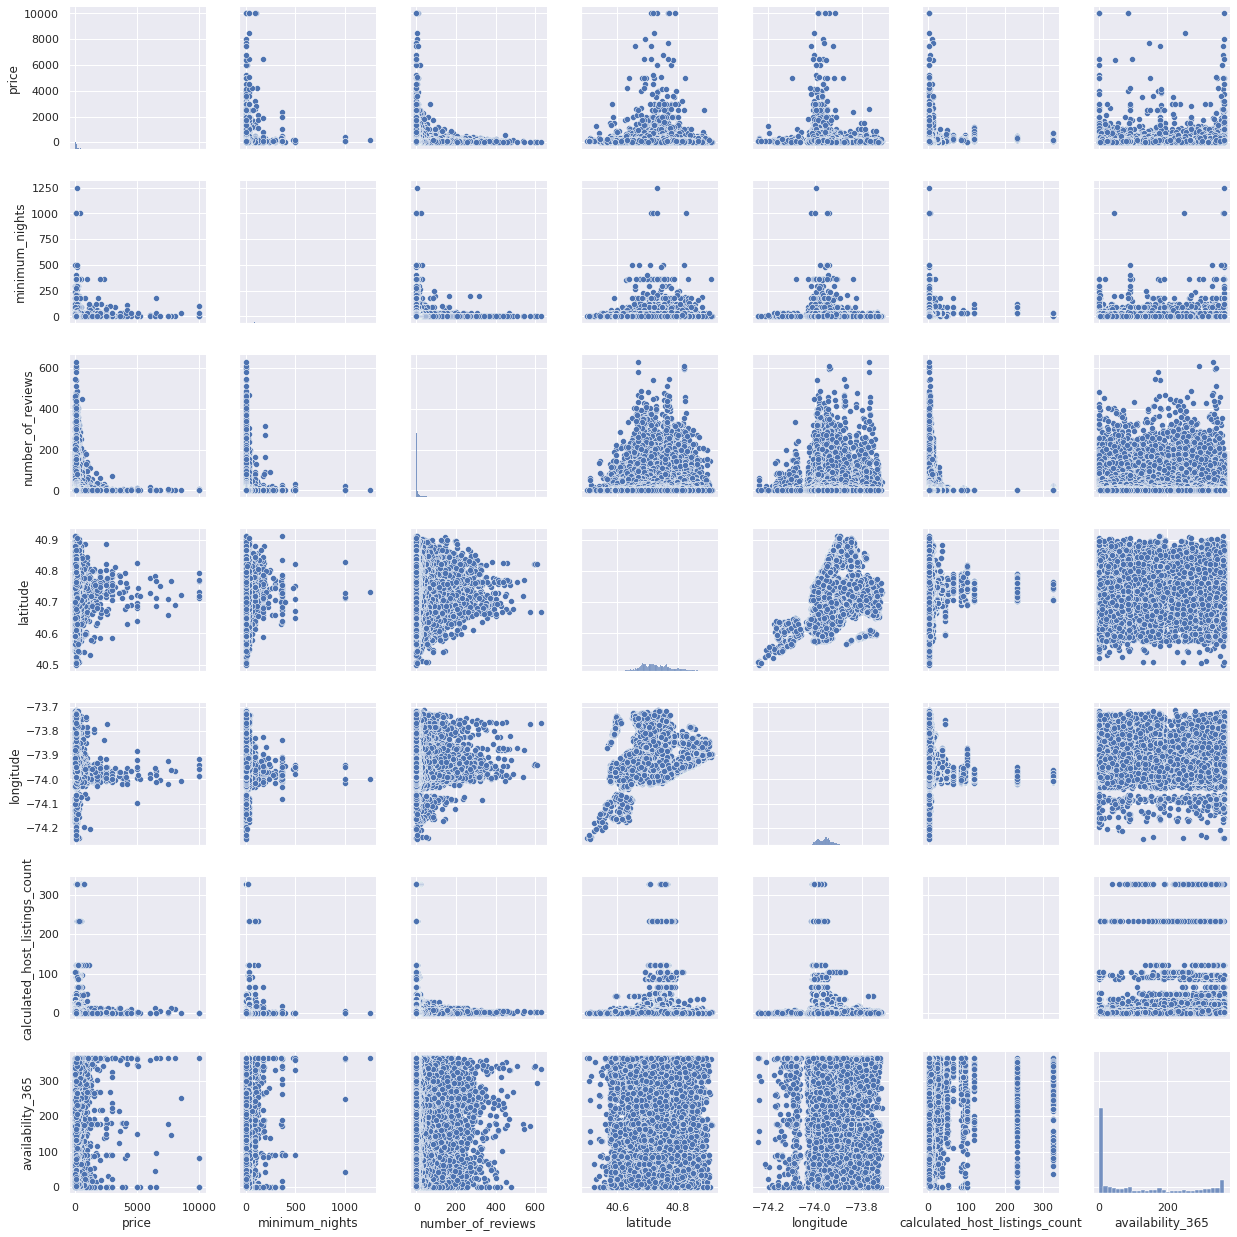

In [ ]:
sns.set()
cols = ['price', 'minimum_nights', 'number_of_reviews', 'latitude', 'longitude', 'calculated_host_listings_count','availability_365']
sns.pairplot(df[cols], size = 2.5)
plt.show();